# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**AI-generated Jupytext Notebook**  
**Caution:** This notebook was generated with the help of AI. Please verify results, code, and analysis for scientific rigor and correctness before drawing conclusions or publishing results.

---

## Overview

This notebook introduces Dandiset **001195**:  
**"Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State"**  
 
[View the Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/001195/0.250408.1733)

**Authors:** Laurel Keyes, Christopher R. Lee, Romy Wichmann, Gillian A. Matthews, Kay M. Tye, et al.

**Description:**  
This Dandiset presents supporting data for a study examining distinct projections of dorsal raphe nucleus (DRN) dopamine neurons in mouse brain and their roles in social motivation and affective states akin to loneliness. The dataset contains:

- In vivo calcium imaging data with behavioral videos
- Ex vivo patch-clamp electrophysiology recordings

The present notebook focuses on how to begin exploring the **electrophysiology** (icephys) data, demonstrating access and visualization on an example file.

---

## What you'll find in this notebook:
- Dandiset overview and experimental context
- Required Python packages (see below)
- How to use the DANDI API to list and access files
- How to stream and inspect a representative NWB file (ex vivo icephys)
- How to extract and plot stimulus and response sweeps
- Step-by-step guidance and best practices

---

## Required packages
 
This notebook assumes the following packages are already installed:
- dandi
- pynwb
- remfile
- h5py
- numpy
- matplotlib


## 1. Setup and Import Packages

In this section, we import the necessary packages for data access, NWB file handling, and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb

## 2. Explore and Retrieve Dandiset Files via the DANDI API

We start by connecting to the DANDI Archive and listing a subset of available assets in Dandiset 001195 (version 0.250408.1733).


In [2]:
# Connect to DANDI Archive and Dandiset
dandiset_id = "001195"
dandiset_version = "0.250408.1733"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first few electrophysiology files
print("Listing available icephys NWB files:\n")
asset_paths = []
for i, asset in enumerate(dandiset.get_assets()):
    path = asset.path
    if "icephys.nwb" in path:
        print(f"{i+1}: {path}")
        asset_paths.append(path)
    if len(asset_paths) >= 5:
        break

Listing available icephys NWB files:



1: sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
2: sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
3: sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
4: sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
5: sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## 3. Select and Stream a Representative NWB File

We will work with the file:

`sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`

(Alternatively, choose any other from the printed list above.)

We'll stream this file directly from the archive using `remfile` and open it with `h5py` and `pynwb` for exploration—no download required.

In [3]:
# Path and asset selection
selected_asset_path = "sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb"
asset = next(dandiset.get_assets_by_glob(selected_asset_path))

# Get direct download URL for streaming
url = asset.download_url

# Open the remote NWB file with remfile and h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print(f"\nLoaded NWB file: {selected_asset_path}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")


Loaded NWB file: sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology


## 4. NWB File Structure and Metadata

Let's extract some key information from the NWB file:

- **Subject metadata**
- **Device and electrode setup**
- **Available acquisition and stimulus timeseries**
- **How the icephys sweeps are organized**


In [4]:
# Subject details
subject = nwb.subject
print("\n--- Subject Information ---")
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Strain: {subject.strain}")
print(f"Genotype: {subject.genotype}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Subject description: {subject.description}")

# Cell, slice, layer annotation (if available)
meta = nwb.lab_meta_data["DandiIcephysMetadata"]
print("\n--- Cell & Slice Metadata ---")
print(f"Cell ID: {meta.cell_id}")
print(f"Slice ID: {meta.slice_id}")
print(f"Targeted layer: {meta.targeted_layer}")

# Devices and electrodes
print("\n--- Devices and Electrodes ---")
for name, dev in nwb.devices.items():
    print(f"Device: {name} | Description: {dev.description}")

for name, elec in nwb.icephys_electrodes.items():
    print(f"Electrode: {name} | Description: {elec.description} | Device: {elec.device.name}")

# Acquisition and stimulus
print("\n--- Acquisition timeseries ---")
for key in list(nwb.acquisition.keys())[:5]:
    print(key)
print("...")

print("\n--- Stimulus timeseries ---")
for key in list(nwb.stimulus.keys())[:5]:
    print(key)
print("...")


--- Subject Information ---
Subject ID: 23
Species: Mus musculus
Strain: DAT::Cre
Genotype: heterozygote
Sex: F
Age: P302D
Subject description: AAV5-DIO-ChR2-eYFP into DRN

--- Cell & Slice Metadata ---
Cell ID: C1
Slice ID: slice 1
Targeted layer: CeA

--- Devices and Electrodes ---
Device: DeviceIcephys | Description: no description
Electrode: electrode-0 | Description: no description | Device: DeviceIcephys
Electrode: electrode-1 | Description: no description | Device: DeviceIcephys

--- Acquisition timeseries ---
current_clamp-response-01-ch-0
current_clamp-response-01-ch-1
current_clamp-response-02-ch-0
current_clamp-response-02-ch-1
current_clamp-response-03-ch-0
...

--- Stimulus timeseries ---
stimulus-01-ch-0
stimulus-01-ch-1
stimulus-02-ch-0
stimulus-02-ch-1
stimulus-03-ch-0
...


## 5. Explore an Example Sweep (Stimulus & Response)

Each sweep (trial) in this ex vivo icephys experiment contains:
- A **stimulus** timeseries: Current applied (typically in pA or nA)
- A **response** timeseries: Membrane voltage response (V)

Let's select the first sweep and plot both the current injection stimulus and the voltage response across the two channels.

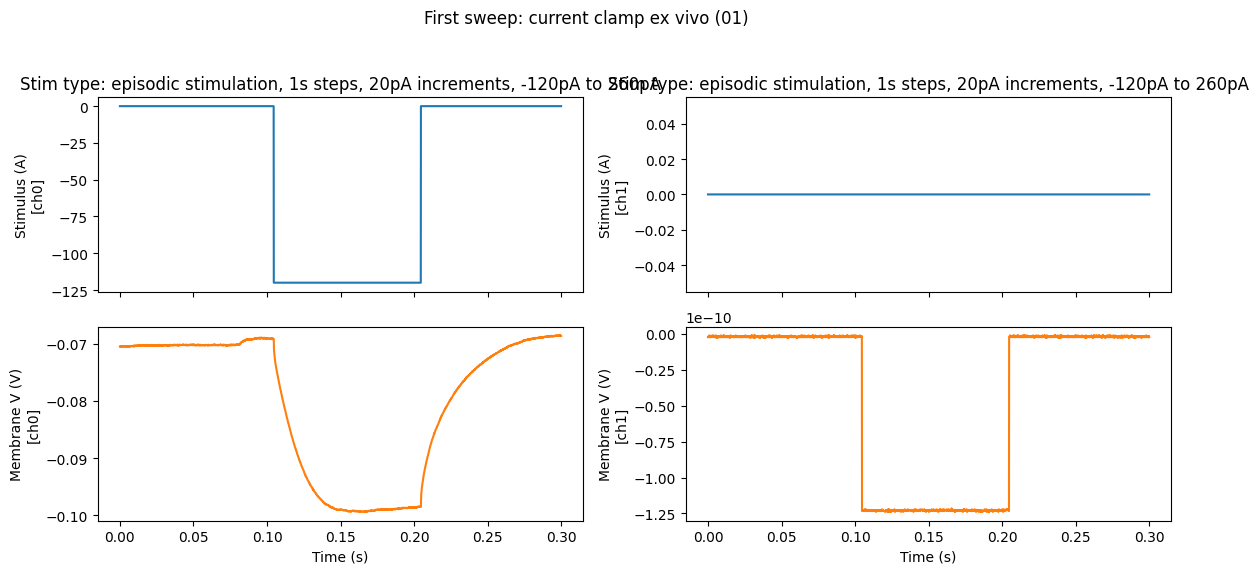

In [5]:
# Plot stimulus and response for the first sweep and both channels
stim_ch0 = nwb.stimulus['stimulus-01-ch-0']
resp_ch0 = nwb.acquisition['current_clamp-response-01-ch-0']

stim_ch1 = nwb.stimulus['stimulus-01-ch-1']
resp_ch1 = nwb.acquisition['current_clamp-response-01-ch-1']

# Time vector for plotting
dt = 1.0 / stim_ch0.rate
time = np.arange(stim_ch0.data.shape[0]) * dt

fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
fig.suptitle('First sweep: current clamp ex vivo (01)')

# Channel 0
axes[0,0].plot(time, stim_ch0.data[:], color='tab:blue')
axes[0,0].set_ylabel(f"Stimulus (A)\n[ch0]")
axes[0,0].set_title(stim_ch0.description)
axes[1,0].plot(time, resp_ch0.data[:] * resp_ch0.conversion, color='tab:orange')
axes[1,0].set_ylabel(f"Membrane V (V)\n[ch0]")
axes[1,0].set_xlabel("Time (s)")

# Channel 1
axes[0,1].plot(time, stim_ch1.data[:], color='tab:blue')
axes[0,1].set_title(stim_ch1.description)
axes[0,1].set_ylabel(f"Stimulus (A)\n[ch1]")
axes[1,1].plot(time, resp_ch1.data[:] * resp_ch1.conversion, color='tab:orange')
axes[1,1].set_ylabel(f"Membrane V (V)\n[ch1]")
axes[1,1].set_xlabel("Time (s)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 6. Plot a Series of Voltage Responses Across Sweeps (Step Protocol)

In this experiment, each sweep applies a different current step (e.g., from -120 pA to +260 pA, in 20 pA increments).

Let's extract, for one channel, all the voltage response traces (sweeps) and plot them together, color-coded by sweep index.

Note: Some sweeps may be of different length (e.g., 3000, 4000, etc. time points). We'll check the minimum length and trim all sweeps to that length so they can be stacked and plotted together.

Number of current clamp sweeps (channel 0): 23


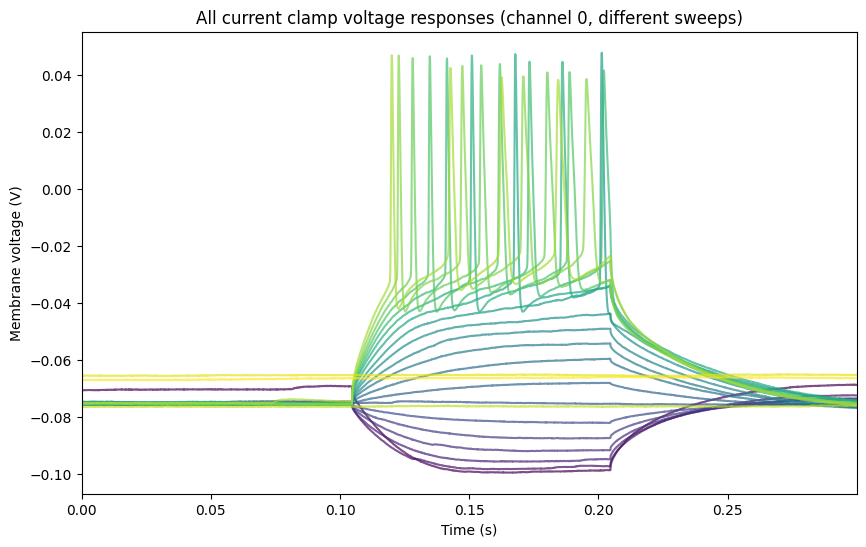

In [6]:
# How many sweeps are in this file?
# Counting keys that match 'current_clamp-response-XX-ch-0'
response_keys = [k for k in nwb.acquisition if k.startswith('current_clamp-response-') and k.endswith('ch-0')]
stimulus_keys = [k for k in nwb.stimulus if k.startswith('stimulus-') and k.endswith('ch-0')]

print(f"Number of current clamp sweeps (channel 0): {len(response_keys)}")

# Check and trim all responses to the same length (minimum found)
response_lengths = [nwb.acquisition[k].data.shape[0] for k in response_keys]
stimulus_lengths = [nwb.stimulus[k].data.shape[0] for k in stimulus_keys]
min_len = min(min(response_lengths), min(stimulus_lengths))

responses = []
stimuli = []

for rkey, skey in zip(response_keys, stimulus_keys):
    resp = nwb.acquisition[rkey]
    stim = nwb.stimulus[skey]
    # Only take the first min_len data points from each sweep
    voltage = resp.data[:min_len] * resp.conversion  # convert to volts
    current = stim.data[:min_len]  # already in amperes per unit
    responses.append(voltage)
    stimuli.append(current)

responses = np.stack(responses)  # shape (num_sweeps, time)
stimuli = np.stack(stimuli)

time_sweep = np.arange(min_len) * (1.0 / nwb.acquisition[response_keys[0]].rate)

# Plot all responses (overlaid)
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0,1,responses.shape[0]))
for i, v in enumerate(responses):
    plt.plot(time_sweep, v, color=colors[i], label=f'Sweep {i+1}' if i<5 else None, alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Membrane voltage (V)")
plt.title("All current clamp voltage responses (channel 0, different sweeps)")
plt.xlim([0, time_sweep[-1]])
plt.show()

## 7. Inspect the Current Steps for Each Sweep

To see how the injected current changes across sweeps, let's extract the mean current for each sweep and plot current vs. sweep index.  
We'll also plot the individual stimulus (current injection) waveforms for a few example sweeps.

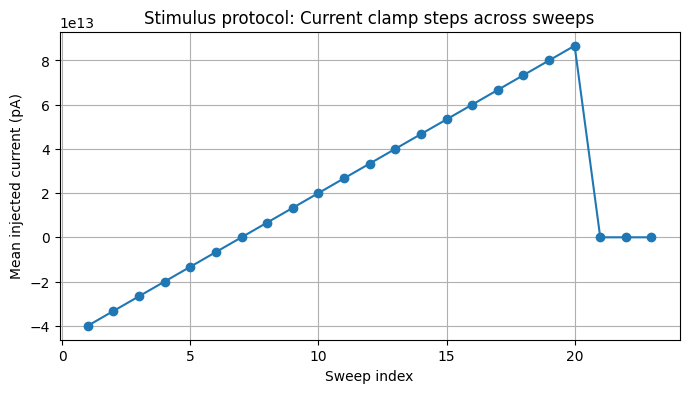

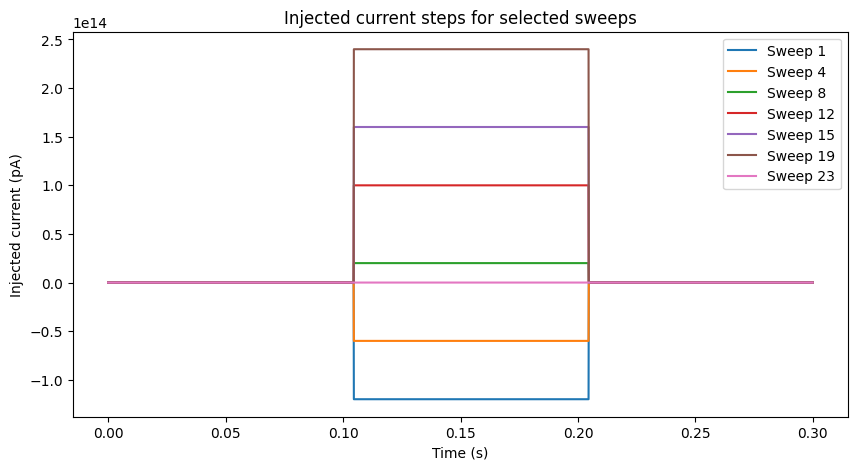

In [7]:
# Compute mean injected current per sweep over entire sweep interval
sweep_currents = [np.mean(s) for s in stimuli]

plt.figure(figsize=(8,4))
plt.plot(range(1, len(sweep_currents)+1), np.array(sweep_currents)*1e12, marker='o')
plt.xlabel("Sweep index")
plt.ylabel("Mean injected current (pA)")
plt.title("Stimulus protocol: Current clamp steps across sweeps")
plt.grid(True)
plt.show()

# Plot a selection of stimulus waveforms to illustrate step protocol
plt.figure(figsize=(10, 5))
sel = np.linspace(0, len(stimuli)-1, min(7, len(stimuli))).astype(int)  # up to 7
for idx in sel:
    plt.plot(time_sweep, stimuli[idx]*1e12, label=f'Sweep {idx+1}')
plt.xlabel("Time (s)")
plt.ylabel("Injected current (pA)")
plt.title("Injected current steps for selected sweeps")
plt.legend()
plt.show()

## 8. Notes on Further Exploration

- This Dandiset contains many other cells, slices, and protocols (files).
- The structure demonstrated here is generalized across similar files in this set.
- For each cell/slice, you can inspect acquisition and stimulus objects, metadata (cell, layer, slice), and subject characteristics via standard pynwb and NWB methods, all accessible via streaming.
- Calcium imaging and behavioral data are present in separate files and can be accessed with similar streaming techniques.

---

## Next steps

- Analyze firing patterns, action potential properties, or passive properties from icephys data.
- Relate electrophysiological responses to specific anatomical targets (see metadata: CeA, BNST, BLP).
- Explore the diversity of cells and their responses to different stimulus protocols.
- Use patching data, together with anatomical/molecular annotations, to map neuronal subtypes and projections.

---

## References and Links
- [Dandiset 001195 on DANDI Archive](https://dandiarchive.org/dandiset/001195/0.250408.1733)
- Matthews, G.A. et al., Keyes, L.R., Lee, C.R., Wichmann, R., Tye, K.M. et al., "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State".

---

*End of notebook. For any questions, consult the Dandiset metadata on the DANDI Archive.*